<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web

SID = '^TWII'
df = web.DataReader(SID,'yahoo',start="2000-01-01")
df = df.iloc[:,:5]

In [2]:
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

In [3]:
print(df.shape)
df.head(3)

(5540, 5)


,High,Low,Open,Close,Volume
Date,,,,,
2000-01-04,8803.610352,8642.500000,8644.910156,8756.549805,0.0
2000-01-05,8867.679688,8668.019531,8690.599609,8849.870117,0.0
2000-01-06,9023.990234,8833.910156,8900.559570,8922.030273,0.0


In [4]:
df.tail(3)

,High,Low,Open,Close,Volume
Date,,,,,
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0


# Labeling(計算return)

In [5]:
#今天股價 = df['Close']
#昨天股價 = df['Close'].shift(1)
#df['return%'] = (今天股價/昨天股價-1)*100
#print(df['return%'].min(),df['return%'].max())
#sns.distplot(df['return%'].dropna())
#df.tail()

# Label triple_barrier

In [6]:
import numpy as np
import math
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)

In [7]:
df.tail(20)

,High,Low,Open,Close,Volume,triple_barrier_signal
Date,,,,,,
2022-06-24,15424.370117,15232.339844,15232.339844,15303.320312,3081400.0,-1
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0
2022-07-04,14412.469727,14167.099609,14237.830078,14217.059570,3244400.0,0
2022-07-05,14488.799805,14100.889648,14345.540039,14349.200195,3468200.0,0
2022-07-06,14319.320312,13985.509766,14289.669922,13985.509766,3688700.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


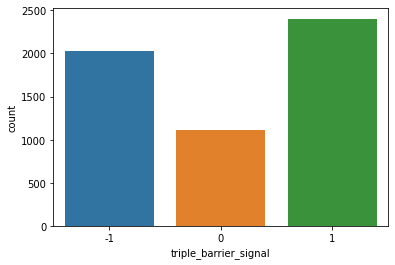

In [8]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

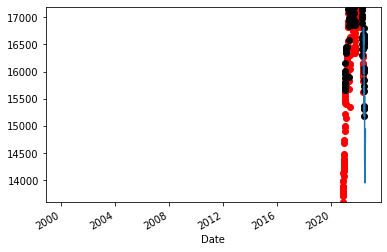

In [9]:
import matplotlib.pyplot as plt
buy = df[df['triple_barrier_signal']==1]['Close']
sell = df[df['triple_barrier_signal']==-1]['Close']
df['Close'][-40:].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
lb = df['Close'][-40:].mean() - 2*df['Close'][-40:].std()
ub = df['Close'][-40:].mean() + 2*df['Close'][-40:].std()
plt.ylim(lb,ub)
plt.show()

# 建立ohlcv

In [10]:
#!pip install finta

In [11]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count    5539.000000
mean       52.587433
std        12.873292
min         9.948198
25%        43.170916
50%        53.269404
75%        61.929324
max       100.000000
Name: RSI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745


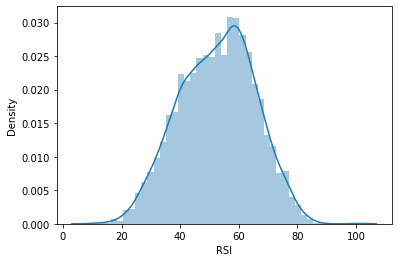

In [12]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    5527.000000
mean      -43.238773
std        31.997325
min      -100.000000
25%       -73.057576
50%       -38.123117
75%       -13.446009
max        -0.000000
Name: Williams %R, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000


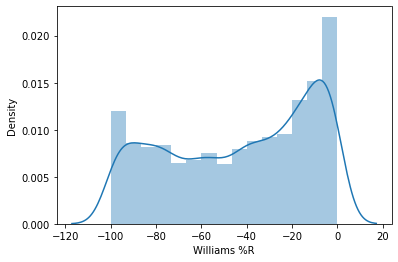

In [13]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     5500.000000
mean      8484.999801
std       2986.425433
min       3821.469018
25%       6327.451312
50%       8068.387677
75%       9555.330817
max      18134.302258
Name: SMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962


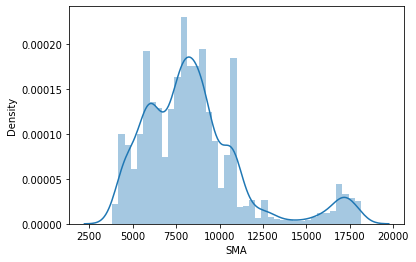

In [14]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count     5540.000000
mean      8507.302291
std       3005.638160
min       3570.937692
25%       6369.362956
50%       8115.391821
75%       9605.295902
max      18370.191557
Name: EMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426


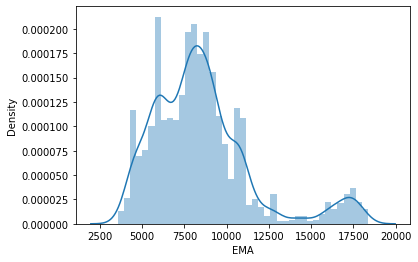

In [15]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     5532.000000
mean      8508.055925
std       3011.088611
min       3527.999544
25%       6364.704658
50%       8107.936849
75%       9612.300081
max      18389.146615
Name: WMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695


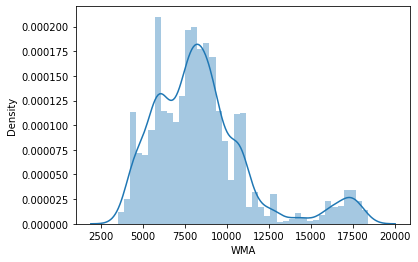

In [16]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     5522.000000
mean      8508.679979
std       3020.035302
min       3433.914340
25%       6347.240551
50%       8100.922734
75%       9622.396157
max      18487.953184
Name: HMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115


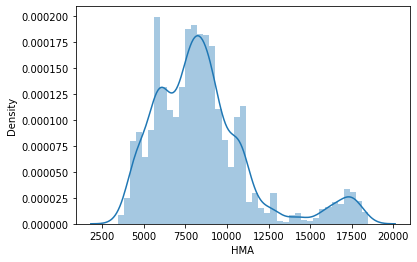

In [17]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     5540.000000
mean      8511.318933
std       3014.987628
min       3447.605265
25%       6362.611946
50%       8101.791331
75%       9621.823558
max      18516.770956
Name: TEMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455


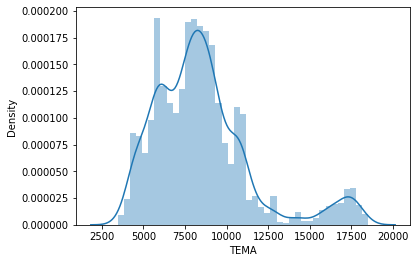

In [18]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    5539.000000
mean       14.499903
std       111.334927
min      -421.723833
25%       -73.948769
50%        32.324582
75%       101.496152
max       405.786443
Name: CCI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742,-36.301224
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053,-9.760287
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868,-4.365800
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105,19.448399
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455,39.237163


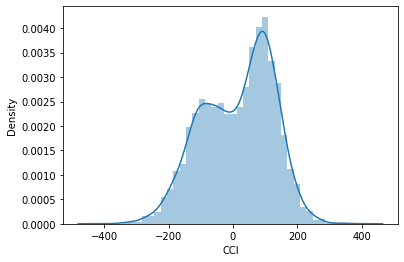

In [19]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    5539.000000
mean        5.611853
std        30.209495
min       -86.464212
25%       -16.363194
50%         7.616751
75%        27.592241
max       100.000000
Name: CMO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742,-36.301224,-9.216763
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053,-9.760287,-0.845573
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868,-4.365800,-2.106316
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105,19.448399,0.055868
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455,39.237163,10.996438


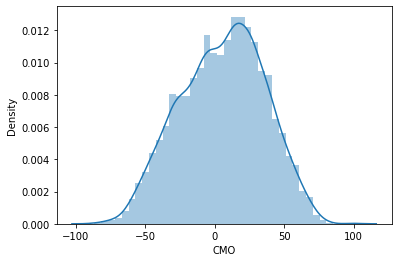

In [20]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    5540.000000
mean       -0.276637
std        35.601955
min      -244.072759
25%       -19.298761
50%         0.725919
75%        20.427723
max       156.874065
Name: MACD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742,-36.301224,-9.216763,29.548699
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053,-9.760287,-0.845573,62.574204
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868,-4.365800,-2.106316,82.456233
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105,19.448399,0.055868,96.998958
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455,39.237163,10.996438,117.763340


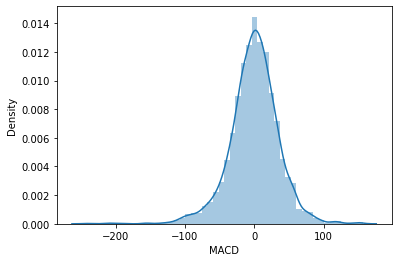

In [21]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    5540.000000
mean       -0.001867
std         0.449486
min        -2.355901
25%        -0.250106
50%         0.001977
75%         0.245522
max         1.956600
Name: PPO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742,-36.301224,-9.216763,29.548699,0.155866
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053,-9.760287,-0.845573,62.574204,0.382802
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868,-4.365800,-2.106316,82.456233,0.521020
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105,19.448399,0.055868,96.998958,0.623419
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455,39.237163,10.996438,117.763340,0.768534


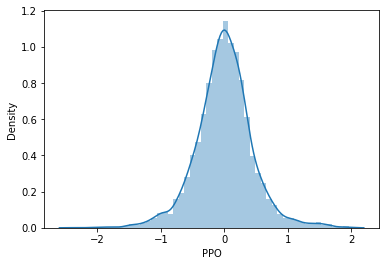

In [22]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    5528.000000
mean        0.213232
std         4.685362
min       -23.361982
25%        -2.227070
50%         0.588853
75%         2.888249
max        23.364389
Name: ROC, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742,-36.301224,-9.216763,29.548699,0.155866,-4.524304
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053,-9.760287,-0.845573,62.574204,0.382802,-0.715586
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868,-4.365800,-2.106316,82.456233,0.521020,2.447173
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105,19.448399,0.055868,96.998958,0.623419,3.630569
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455,39.237163,10.996438,117.763340,0.768534,4.101274


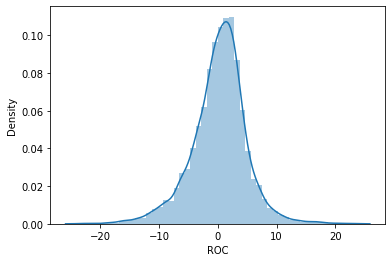

In [23]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    5.531000e+03
mean     2.961627e+10
std      1.645132e+10
min      0.000000e+00
25%      1.732466e+10
50%      3.682924e+10
75%      4.144438e+10
max      6.645785e+10
Name: CFI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742,-36.301224,-9.216763,29.548699,0.155866,-4.524304,4.004711e+10
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053,-9.760287,-0.845573,62.574204,0.382802,-0.715586,4.018721e+10
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868,-4.365800,-2.106316,82.456233,0.521020,2.447173,4.028806e+10
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105,19.448399,0.055868,96.998958,0.623419,3.630569,4.039576e+10
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455,39.237163,10.996438,117.763340,0.768534,4.101274,4.048388e+10


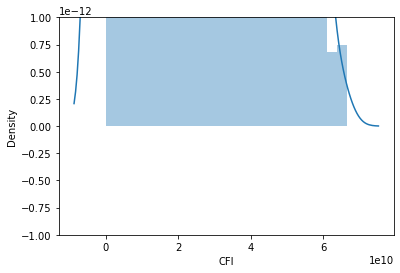

In [24]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    5527.000000
mean       -0.386575
std        17.566141
min       -73.465234
25%       -12.409654
50%         0.165972
75%        11.623263
max        54.309679
Name: DMI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742,-36.301224,-9.216763,29.548699,0.155866,-4.524304,4.004711e+10,-19.479263
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053,-9.760287,-0.845573,62.574204,0.382802,-0.715586,4.018721e+10,-14.964747
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868,-4.365800,-2.106316,82.456233,0.521020,2.447173,4.028806e+10,-13.884642
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105,19.448399,0.055868,96.998958,0.623419,3.630569,4.039576e+10,-8.420844
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455,39.237163,10.996438,117.763340,0.768534,4.101274,4.048388e+10,-7.032810


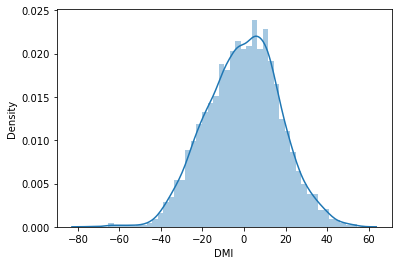

In [25]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count     5540.000000
mean      8485.353683
std       3003.017814
min       3411.679932
25%       6325.542478
50%       8089.254361
75%       9631.167719
max      18619.609375
Name: SAR, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-15,14579.730469,14378.330078,14483.959961,14550.620117,3025600.0,0,42.594084,-61.240865,15536.994141,14433.793655,...,14164.344276,14400.040742,-36.301224,-9.216763,29.548699,0.155866,-4.524304,4.004711e+10,-19.479263,13928.660156
2022-07-18,14719.639648,14589.099609,14589.099609,14719.639648,3117300.0,0,45.781107,-44.951593,15505.270222,14490.962854,...,14305.934627,14574.045053,-9.760287,-0.845573,62.574204,0.382802,-0.715586,4.018721e+10,-14.964747,13954.702969
2022-07-19,14720.129883,14598.990234,14638.450195,14694.080078,2964100.0,0,45.370896,-37.214828,15469.885599,14531.586299,...,14444.305434,14671.440868,-4.365800,-2.106316,82.456233,0.521020,2.447173,4.028806e+10,-13.884642,14000.599170
2022-07-20,14906.950195,14694.200195,14810.400391,14733.219727,3539900.0,0,46.166364,-17.758585,15435.173638,14571.912984,...,14570.954000,14748.580105,19.448399,0.055868,96.998958,0.623419,3.630569,4.039576e+10,-8.420844,14058.161627
2022-07-21,14937.700195,14716.019531,14744.169922,14937.700195,0.0,0,50.242745,-0.000000,15410.150962,14645.070426,...,14705.531115,14891.959455,39.237163,10.996438,117.763340,0.768534,4.101274,4.048388e+10,-7.032810,14143.040483


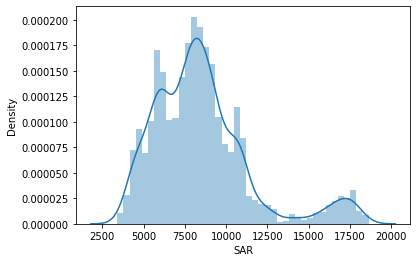

In [26]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [27]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = df.columns[-15:].tolist() #取15個剛剛建立的技術指標當特徵
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(5540, 21)
(5500, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-07-15,42.594084,-61.240865,15536.994141,14433.793655,14340.667036,14164.344276,14400.040742,-36.301224,-9.216763,29.548699,0.155866,-4.524304,4.004711e+10,-19.479263,13928.660156,0
2022-07-18,45.781107,-44.951593,15505.270222,14490.962854,14423.695421,14305.934627,14574.045053,-9.760287,-0.845573,62.574204,0.382802,-0.715586,4.018721e+10,-14.964747,13954.702969,0
2022-07-19,45.370896,-37.214828,15469.885599,14531.586299,14493.379905,14444.305434,14671.440868,-4.365800,-2.106316,82.456233,0.521020,2.447173,4.028806e+10,-13.884642,14000.599170,0
2022-07-20,46.166364,-17.758585,15435.173638,14571.912984,14555.146311,14570.954000,14748.580105,19.448399,0.055868,96.998958,0.623419,3.630569,4.039576e+10,-8.420844,14058.161627,0
2022-07-21,50.242745,-0.000000,15410.150962,14645.070426,14648.987695,14705.531115,14891.959455,39.237163,10.996438,117.763340,0.768534,4.101274,4.048388e+10,-7.032810,14143.040483,0


# 相關性分析

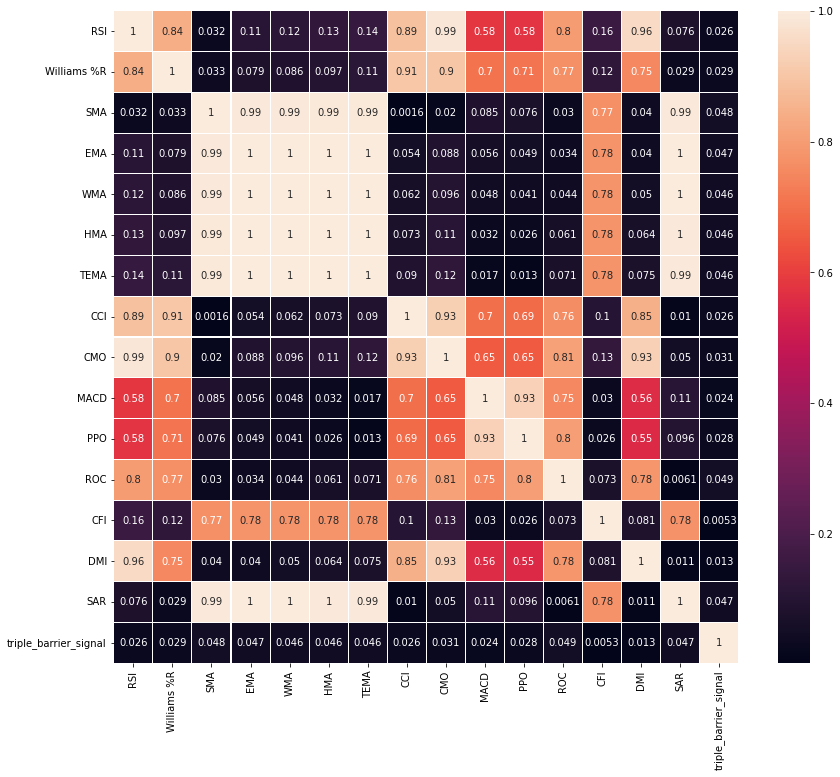

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,
                         index = df.index,
                         columns = df.columns)#轉回dataframe格式
df_minmax[y_name] = df[y_name]#y不用MinMaxScaler
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-07-15,0.420474,0.387591,0.818533,0.734014,0.727580,0.712794,0.726811,0.465762,0.460885,0.682438,0.582439,0.403149,0.602594,0.422508,0.691546,0
2022-07-18,0.461523,0.550484,0.816316,0.737877,0.733167,0.722200,0.738358,0.497835,0.510830,0.764807,0.635061,0.484660,0.604702,0.457840,0.693258,0
2022-07-19,0.456239,0.627852,0.813844,0.740622,0.737856,0.731391,0.744821,0.504354,0.503308,0.814395,0.667112,0.552347,0.606220,0.466293,0.696276,0
2022-07-20,0.466485,0.822414,0.811419,0.743347,0.742012,0.739804,0.749940,0.533132,0.516208,0.850666,0.690857,0.577673,0.607840,0.509054,0.700061,0
2022-07-21,0.518988,1.000000,0.809671,0.748290,0.748326,0.748744,0.759455,0.557046,0.581484,0.902454,0.724506,0.587746,0.609166,0.519918,0.705642,0


In [30]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [31]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
b_index = 0
f_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(b_index ,f_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,
                 df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 5486/5486 [00:14<00:00, 382.22it/s]


準備完成


# check

In [32]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 5486
第一筆的index開始和結束:2000-03-08-2000-03-28
最後一筆的index開始和結束:2022-07-01-2022-07-21


# Reshape X

(圖片數量,長,寬,1張)

In [33]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(5486, 15, 15)
(5486, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [34]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(5486, 1)
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]]
(5486, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Visualization

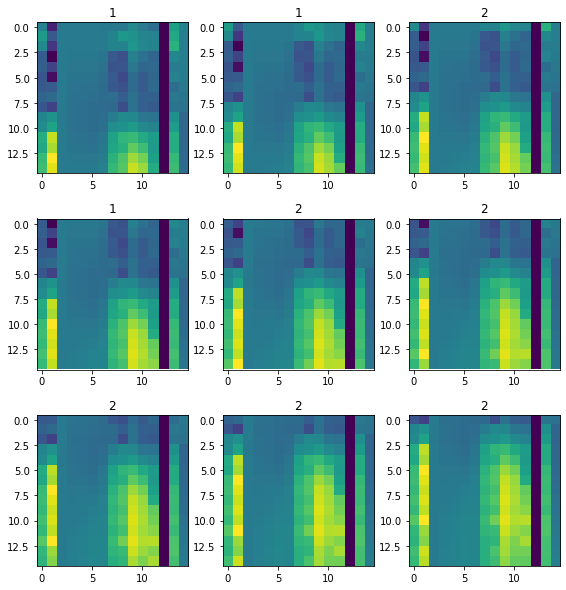

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [36]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(5446, 15, 15, 1) (5446, 3) (40, 15, 15, 1)


# 調整採樣

In [37]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(5446, 225)
(5446,)
0    1093
1    1093
2    1093
Name: 0, dtype: int64
(3279, 15, 15, 1)
(3279, 3)


# Split training and val sets

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X_train,
                                              y_train, 
                                              test_size = 0.2,
                                              random_state = 42,
                                              shuffle = True,#是否洗牌
                                              stratify = y_train #是否根據y欄位做分層取樣
                                             )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(2623, 15, 15, 1) (2623, 3) (656, 15, 15, 1) (656, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [39]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    2371
2    2003
0    1112
dtype: int64

In [40]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    1093
1    1093
2    1093
dtype: int64

In [41]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

2    875
0    874
1    874
dtype: int64

In [42]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

0    219
1    219
2    218
dtype: int64

# CNN

In [43]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [44]:
model = Sequential()

nclasses = 3 

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                        

In [45]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [46]:
#1
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc', 
                                 factor=0.5, 
                                 patience = 3, 
                                 verbose = 1, 
                                 min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0, 
                   patience=50,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [47]:
history = model.fit(xtrain,ytrain,
                    batch_size = 128,
                    epochs = 500,
                    validation_data=(xval,yval),
                    verbose=1,callbacks=[es])

Epoch 1/500
21/21 [==============================] - 13s 24ms/step - loss: 1.1031 - accuracy: 0.3446 - val_loss: 1.0959 - val_accuracy: 0.3933
Epoch 2/500
21/21 [==============================] - 0s 7ms/step - loss: 1.0993 - accuracy: 0.3279 - val_loss: 1.0915 - val_accuracy: 0.4573
Epoch 3/500
21/21 [==============================] - 0s 7ms/step - loss: 1.0889 - accuracy: 0.3770 - val_loss: 1.0697 - val_accuracy: 0.4512
Epoch 4/500
21/21 [==============================] - 0s 7ms/step - loss: 1.0737 - accuracy: 0.4037 - val_loss: 1.0382 - val_accuracy: 0.4466
Epoch 5/500
21/21 [==============================] - 0s 7ms/step - loss: 1.0642 - accuracy: 0.4144 - val_loss: 1.0193 - val_accuracy: 0.4954
Epoch 6/500
21/21 [==============================] - 0s 7ms/step - loss: 1.0492 - accuracy: 0.4365 - val_loss: 1.0082 - val_accuracy: 0.4893
Epoch 7/500
21/21 [==============================] - 0s 7ms/step - loss: 1.0435 - accuracy: 0.4487 - val_loss: 1.0122 - val_accuracy: 0.4680
Epoch 8/500

# 訓練過程評估

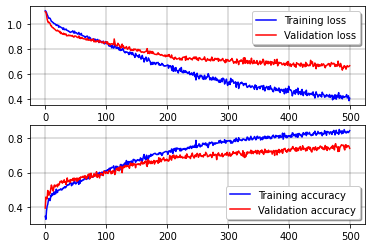

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

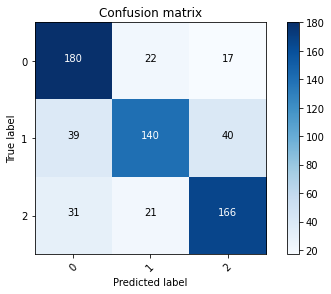

In [49]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [50]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


真實y值

In [51]:
print(yval[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


# 分類報告

In [52]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

0.7408536585365854

In [53]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.72      0.82      0.77       219
         BUY       0.77      0.64      0.70       219
        SELL       0.74      0.76      0.75       218

   micro avg       0.74      0.74      0.74       656
   macro avg       0.74      0.74      0.74       656
weighted avg       0.74      0.74      0.74       656
 samples avg       0.74      0.74      0.74       656



# plot error

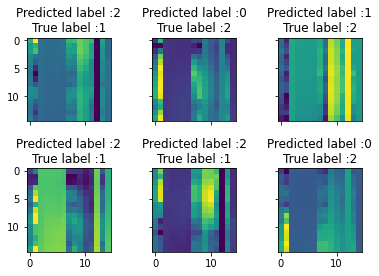

In [54]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 預測最後40筆

In [55]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

40


# 0~20筆

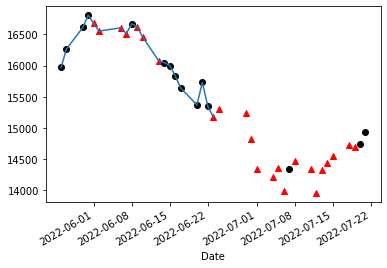

In [56]:
INDEX60 = df[-60:].index
C = web.DataReader(SID,'yahoo',start="2000-01-01")[['Close']]
C = C.loc[INDEX60,:]
C['SIGNAL'] = [np.nan for _ in range(20)] + answer #20個NAN+預測答案
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'][20:40].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 20~40筆

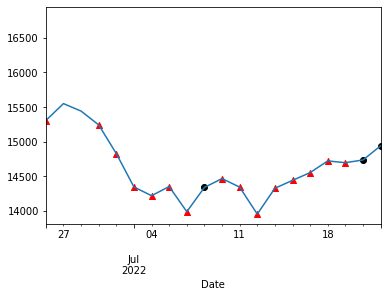

In [57]:
C['Close'][40:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 合併

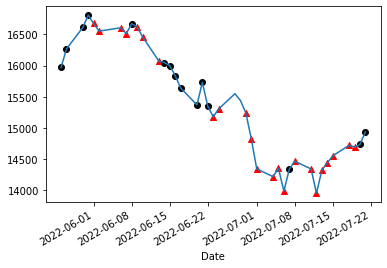

In [58]:
C['Close'][20:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 平滑版本

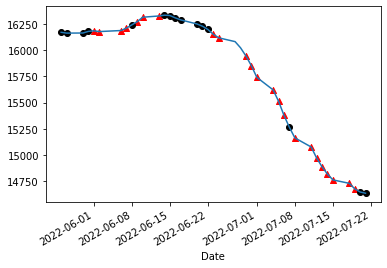

In [59]:
C_roll20 = pd.DataFrame(index=C.index)#空的dataframe index = 倒數60天股票日期
C_roll20['Close'] = C['Close'].rolling(20).mean()#收盤價做20天平滑
C_roll20['SIGNAL'] = C['SIGNAL']
buy = C_roll20[C_roll20['SIGNAL']==1]['Close']#買點
sell= C_roll20[C_roll20['SIGNAL']==2]['Close']#賣點
C_roll20['Close'][20:].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [60]:
C = C.dropna(axis=0)
C

,Close,SIGNAL
Date,,
2022-05-26,15968.830078,2.0
2022-05-27,16266.219727,2.0
2022-05-30,16610.619141,2.0
2022-05-31,16807.769531,2.0
2022-06-01,16675.089844,1.0
2022-06-02,16552.570312,1.0
2022-06-06,16605.960938,1.0
2022-06-07,16512.880859,1.0
2022-06-08,16670.509766,2.0


In [61]:
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.tail(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,SIGNAL,HOLD%,BUY%,SELL%
Date,,,,,
2022-05-26,15968.830078,2.0,1.643192e-08,0.280095,0.719905
2022-05-27,16266.219727,2.0,1.049321e-04,0.060165,0.939730
2022-05-30,16610.619141,2.0,3.056406e-03,0.072945,0.923998
2022-05-31,16807.769531,2.0,2.792967e-02,0.136513,0.835557
2022-06-01,16675.089844,1.0,7.594296e-03,0.641950,0.350455
2022-06-02,16552.570312,1.0,2.916627e-03,0.692416,0.304667
2022-06-06,16605.960938,1.0,8.858041e-04,0.741114,0.258000
2022-06-07,16512.880859,1.0,4.128554e-05,0.683608,0.316351
2022-06-08,16670.509766,2.0,9.908155e-04,0.443188,0.555821


In [69]:
14733 - 14464

269

In [62]:
def 勝率(df):
  t = []
  for i,idx in enumerate(df.index):
    訊號 = np.argmax(df.iloc[i,-3:])
    if 訊號 == 1:#buy
      try:
        點差 = df.iloc[i+1,0] - df.iloc[i,0]
        if 點差>0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 2:#sell
      try:
        點差 = df.iloc[i,0] - df.iloc[i+1,0]
        if 點差<0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 0:#hold
      pass
  return np.mean(t)
#C['Close'].shift()-C['Close'],len(C['Close'].shift()-C['Close'])
勝率(df)

0.6258205689277899

In [63]:
t = []
for i in range(len(C)):
  signal = np.argmax(C.iloc[i,-3:])
  if signal == 2:
    signal = -1
    t.append(signal)
  if signal == 1:
    signal = 1
    t.append(signal)
  if signal == 0:
    t.append(signal)
t,len(t)

([-1,
  -1,
  -1,
  -1,
  1,
  1,
  1,
  1,
  -1,
  1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  -1],
 40)

In [70]:
a = (C['Close'].shift()-C['Close']).values*t
平均獲利 = pd.Series((a>0)*a).dropna().mean()
平均損失 = pd.Series((a<0)*a).dropna().mean()
賠率 = 1-勝率(df)
print(勝率(df),平均獲利,賠率,平均損失)
分子 = 勝率(df)*平均獲利
分母 =  賠率*平均損失*-1
print(分子,分母)
盈虧比 = (分子)/(分母)
盈虧比

0.6258205689277899 133.26016626602564 0.3741794310722101 -58.82003705929487
83.39695306801605 22.009248002493266


3.7891777610288466

In [65]:
賠率

0.3741794310722101

# save model

In [66]:
model.save('Rikcy_net.h5')
del model

In [67]:
from keras.models import load_model
model = load_model('Rikcy_net.h5')
predict = model.predict(X_test)

In [68]:
predict[-5:]

array([[0.00131258, 0.70596296, 0.29272446],
       [0.00063607, 0.78444964, 0.21491432],
       [0.0000059 , 0.6952374 , 0.3047567 ],
       [0.00000661, 0.42166328, 0.57833004],
       [0.00668301, 0.14649595, 0.84682107]], dtype=float32)